<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 3 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Consideremos la siguiente función:

$$
f(x) = \sin(x)^2 + \sin(x^2)
$$

A continuación se muestra una gráfica de la función en nuestro intervalo de interés $[-5,5]$:

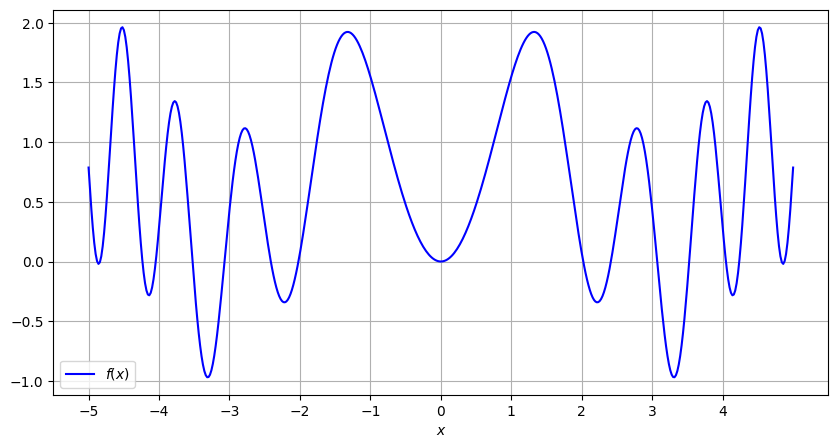

In [2]:
f = lambda x: np.power(np.sin(x),2) + np.sin(np.power(x,2))

a,b = -5.,5.
plt.figure(figsize=(10,5))
x = np.linspace(a,b,500)
y = f(x)
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b))
plt.legend(loc='best')
plt.show()

# Funciones Entregadas (No debe modificarlas)

In [3]:
def Lagrange(x, y):
    n = len(x)
    l = np.array([y[i]/np.prod(x[i] - np.delete(x,i)) for i in range(n)])
    p = lambda xp: np.dot(l,[np.prod(xp - np.delete(x,j)) for j in range(n)])    
    return np.vectorize(p)

def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2

Si obtenemos un polinomio $p(x)$ mediante una interpolación de Lagrange con $n = 40$ puntos equiespaciados y luego evaluamos en $m = 80$ puntos equiespaciados, se tiene el siguiente resultado: 

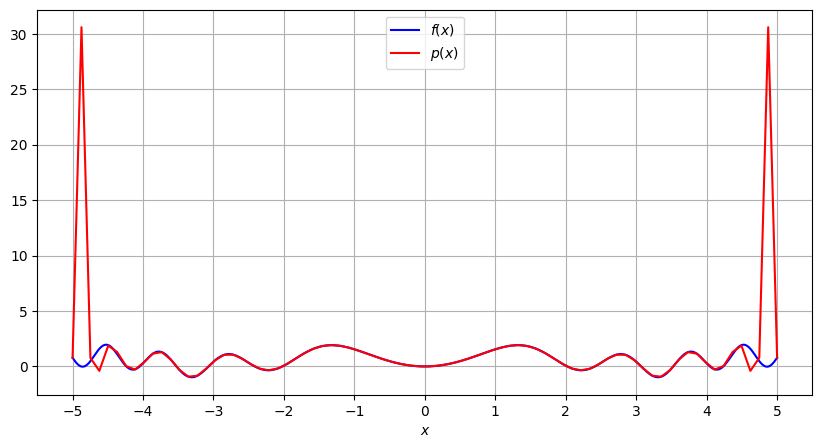

In [4]:
#No modificar código
n = 40
xp = np.linspace(a,b,n)
yp = f(xp)
pLag = Lagrange(xp,yp)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
m = 80
xx = np.linspace(a,b,m)
yy = pLag(xx)
plt.plot(xx,yy,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

Podemos notar que no en todo el intervalo de interés $[-5,5]$ el polinomio se ajusta, ya que se observa el fenómeno Runge cerca del inicio y final del intervalo.

¿Podemos mejorar la aproximación? Probemos utilizando los puntos de Chebyshev en nuestro intervalo de interés:

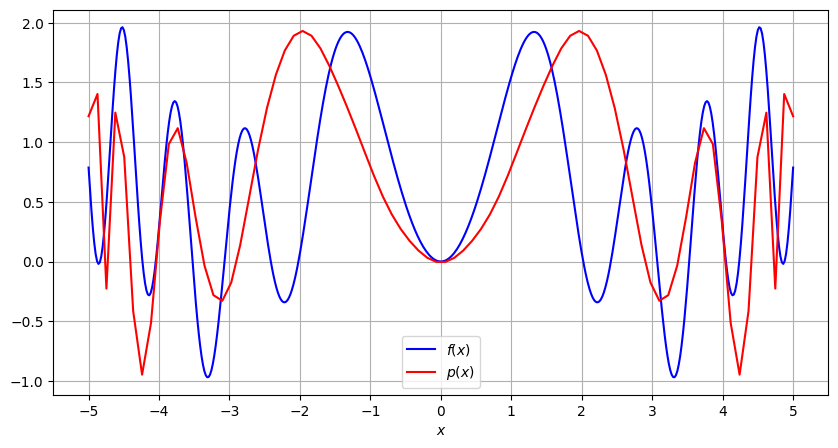

In [5]:
#No modificar código
n = 40
xc = Chebyshev_points(a,b,n)
yc = f(xp)
pLag = Lagrange(xc,yc)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
m = 80
xx = np.linspace(a,b,m)
yy = pLag(xx)
plt.plot(xx,yy,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

Al parecer sí mejora bastante la aproximación. Sin embargo, dada la forma que tiene la función, apostaremos a otra técnica para mejorar las aproximaciones realizadas hasta ahora. Utilizaremos **piecewise interpolation**.

Este tipo de interpolación consiste en realizar *interpolaciones por parte*, es decir, calcular polinomios interpoladores $p_k(x)$ con $k = 1,\dots,d$ para $d$ intervalos. Por ejemplo si $d = 2$, entonces $p_1(x)$ es el polinomio interpolador para el intervalo $[-5,0]$ y $p_2$ es el polinomio interpolador para $[0,5]$. Cada polinomio interpolador, por supuesto, utiliza $n$ puntos para la aproximación. 

En caso de evaluar algún punto $x_j \in [-5,5]$, se debe considerar el polinomio interpolador correspondiente, es decir, si $x_j \in [-5,0]$ se debe evaluar $p_1(x_j)$, en cambio si $x_j \in [0,5]$ se debe evaluar $p_2(x_j)$.

# Pregunta 1. (15 puntos)

Construya la función **lin_pol_interval** que permita construir, mediante la interpolación de Lagrange, un polinomio interpolador lineal en un intervalo $[x_i,x_f]$ para una función $f(x)$ con puntos equiespaciados.

In [6]:
def lin_pol_interval(f,xi,xf):
    """
    input:
    f    : (callable) function to evaluate.
    xi   : (double)   initial value of interval.
    xf   : (double)   final value of interval.
    
    output:
    lin_p: (callable) linear polynomial. 
    """
    #acá va su codigo
    #-------------------------------
    xp = np.linspace(xi, xf, 2)
    yp = f(xp)
    lin_p = Lagrange(xp, yp)
    #--------------------------------
    return lin_p

# Pregunta 2. (15 puntos)

Construya la función **quad_pol_interval** que permita construir, mediante la interpolación de Lagrange, un polinomio interpolador cuadrático en un intervalo $[x_i,x_f]$ para una función $f(x)$ con puntos equiespaciados. *Hint: you need 3 points in the interval for the interpolation.*

In [7]:
def quad_pol_interval(f,xi,xf):
    """
    input:
    f     : (callable) function to evaluate.
    xi    : (double)   initial value of interval.
    xf    : (double)   final value of interval.
    
    output:
    quad_p: (callable) quadratic polynomial. 
    """
    #acá va su codigo
    #--------------------------------
    xp = np.linspace(xi, xf, 3)
    yp = f(xp)
    quad_p = Lagrange(xp, yp)
    #--------------------------------
    return quad_p

In [8]:
vectorized_func = quad_pol_interval(f, -5, 5)

# Inspeccionar la documentación
print(vectorized_func.__doc__)

# Inspeccionar el código fuente
# print(inspect.getsource(vectorized_fun.c))

# Ver los atributos del objeto
print(dir(vectorized_func))

None
['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_call_as_normal', '_doc', '_get_ufunc_and_otypes', '_in_and_out_core_dims', '_init_stage_2', '_ufunc', '_vectorize_call', '_vectorize_call_with_signature', 'cache', 'excluded', 'otypes', 'pyfunc', 'signature']


# Pregunta 3. (20 puntos)

Construya la función **piecewise_lin** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios lineales en un intervalo $[a,b]$ para una función $f(x)$ con puntos equiespaciados. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo.

In [9]:
def piecewise_lin(f,a,b,d,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of linear polynomials.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of linear polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    aux = lambda x, y: x + (y * ((x[-1] - x[0])))
    def evaluar(pol, xp):
        y_a = pol(xp)
        return y_a
    
    polVec = np.vectorize(lin_pol_interval, signature='(),(),()->()')
    evaluarVec = np.vectorize(evaluar, signature='(), (n) -> (n)')
    auxVec = np.vectorize(aux, signature='(n), () -> (n)')

    dp = np.arange(0, d)
    xp = np.linspace(a, b, d + 1)
    arrayPol = polVec(f, xp[:-1], xp[1:])
    mp = np.linspace(xp[0], xp[1], (m + 1))
    x_a = auxVec(mp, dp)
    y_a = evaluarVec(arrayPol, x_a).flatten()
    x_a = x_a.flatten()
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios lineales.

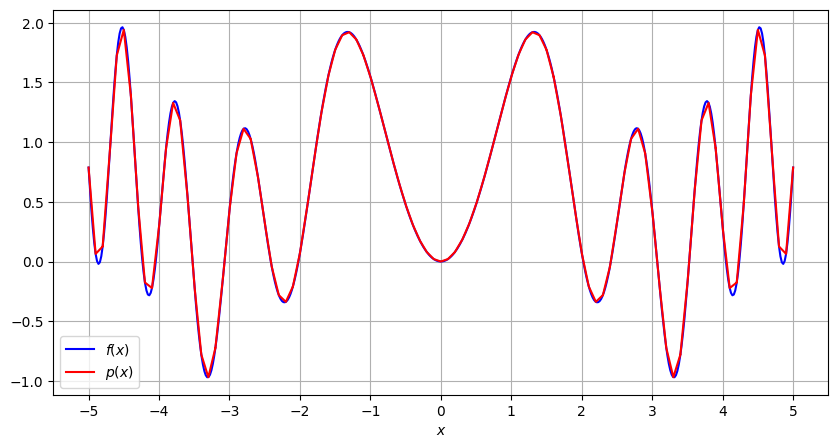

In [10]:
#No modificar este código, solamente ejecute.
d = 100
m = 20
x_a,y_a = piecewise_lin(f,a,b,d,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

# Pregunta 4. (20 puntos)

Construya la función **piecewise_quad** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios cuadráticos en un intervalo $[a,b]$ para una función $f(x)$ con puntos equiespaciados. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo.

In [18]:
def piecewise_quad(f,a,b,d,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of quadratic polynomials.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of quadratic polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    aux = lambda x, y: x + (y * ((x[-1] - x[0])))
    def evaluar(pol, xp):
        y_a = pol(xp)
        return y_a
    
    quadVec = np.vectorize(quad_pol_interval, signature='(),(),()->()')
    evaluarVec = np.vectorize(evaluar, signature='(), (n) -> (n)')
    auxVec = np.vectorize(aux, signature='(n), () -> (n)')

    dp = np.arange(0, d)
    xp = np.linspace(a, b, d + 1)
    arrayQaud = quadVec(f, xp[:-1], xp[1:])
    mp = np.linspace(xp[0], xp[1], (m + 1))
    print(mp)
    x_a = auxVec(mp, dp)
    y_a = evaluarVec(arrayQaud, x_a).flatten()
    x_a = x_a.flatten()
    print(len(x_a),y_a)
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios cuadráticos.

[-5.   -4.99 -4.98 -4.97 -4.96 -4.95 -4.94 -4.93 -4.92 -4.91 -4.9  -4.89
 -4.88 -4.87 -4.86 -4.85 -4.84 -4.83 -4.82 -4.81 -4.8 ]
[-5.   -4.99 -4.98 ...  4.98  4.99  5.  ] [0.78718401 0.67954029 0.57974491 ... 0.57974491 0.67954029 0.78718401]


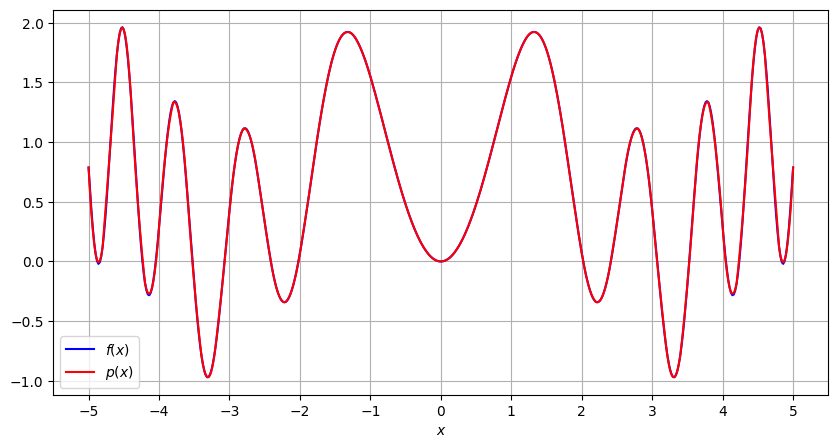

In [19]:
#No modificar este código, solamente ejecute.
d = 50
m = 20
x_a,y_a = piecewise_quad(f,a,b,d,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

# Pregunta 5. (20 puntos)

Construya la función **piecewise_chev** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios de grado $(n-1)$ en un intervalo $[a,b]$ para una función $f(x)$ utilizando $n$ puntos de Chebyshev para cada sub-intervalo $[x_k,x_{k+1}]$. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo. Considere que $m > n$.

In [13]:
def piecewise_chev(f,a,b,d,n,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of polynomials.
    n   : (int)      number of points for Chebyshev interpolation.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    aux = lambda xi, xf: Chebyshev_points(xi, xf, (m + 1))
    aux2 = lambda x, y: x + (y * ((x[-1] - x[0])))
    
    def pol(xp):
        yc = f(xp)
        pLag = Lagrange(xp,yc)
        return pLag
    
    def evaluar(pol, xp):
        y_a = pol(xp)
        return y_a
    
    polVec = np.vectorize(pol, signature='(n)->()')
    auxVec = np.vectorize(aux, signature='(),() -> (n)')
    aux2Vec = np.vectorize(aux2, signature='(n), () -> (n)')
    evaluarVec = np.vectorize(evaluar, signature='(), (n) -> (n)')

    dp = np.arange(0, d)
    xp = np.linspace(a, b, d + 1) #el intervalos se divide en d partes iguales
    xpChev = auxVec(xp[:-1], xp[1:]) #puntos de chev para d intervalos 
    arrPol = polVec(xpChev) #polinomios creados con puntos de chev
    mp = np.linspace(xp[0], xp[1], (m + 1)) #m puntos a evaluar en un intervalo
    x_a = aux2Vec(mp, dp) #puntos para todo el intervalo
    y_a = evaluarVec(arrPol, x_a).flatten()
    x_a = x_a.flatten()
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios de grado $(n - 1)$ utilizando puntos de Chebyshev.

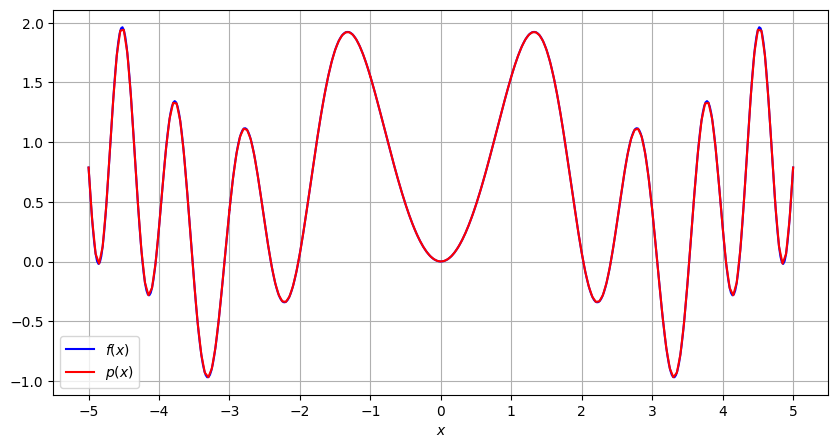

In [14]:
#No modificar este código, solamente ejecute.
d = 10
n = 8
m = 20
x_a,y_a = piecewise_chev(f,a,b,d,n,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

**¡Ya ha llegado al final de la tarea 3! Ahora debe enviarla antes de las 12:00 hrs. del sábado 18 de mayo!**